In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from scipy.optimize import curve_fit as cf
import warnings
warnings.filterwarnings("ignore")

The mean distance to the cluster is: 444.7050217048545 lyr


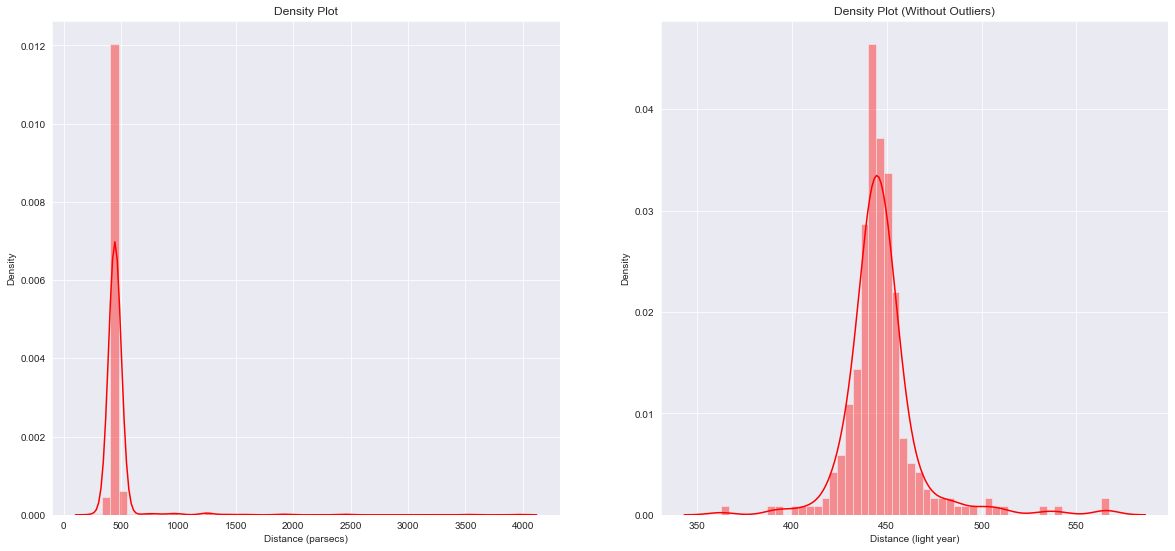

In [2]:
df=pd.read_csv("Pleiades_Cluster.csv")
plx_col=df.loc[:,'plx']
plx=plx_col.values
d=1000/plx*u.pc
D=d.to(u.lyr)

fig1=plt.figure(figsize=(20,20))
sns.set_style("dark")
ax=fig1.add_subplot(221)
plt.title("Density Plot")
ax=sns.distplot(D,hist=True,color='red')
ax.set(xlabel='Distance (parsecs)')
plt.grid()
sum=0
count=0
i=[]
j=0
for val in d.value:
    if val>100 and val<200:
        sum=sum+val
        count=count+1
    if val<100 or val>200:
        i.append(j)
    j=j+1

df1=df.drop(i,axis=0)
mean=sum/count*u.pc
print("The mean distance to the cluster is:",mean.to(u.lyr))
df1_clean=df1.dropna()
d1=1000/(df1_clean.loc[:,'plx'].values)*u.pc
ax=fig1.add_subplot(222)
plt.title("Density Plot (Without Outliers)")
ax=sns.distplot(d1.to(u.lyr),hist=True,color='red')
ax.set(xlabel='Distance (light year)')
plt.grid()

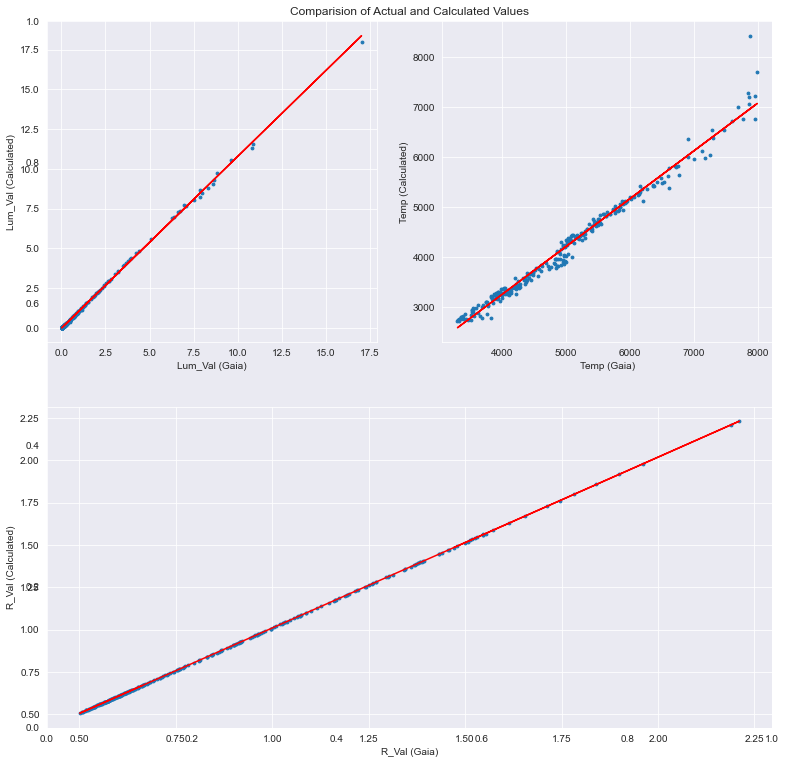

In [3]:
gmag_col=df1_clean.loc[:,'gmag']
m=gmag_col.values
color=df1_clean.loc[:,'bp_rp'].values
d1.to(u.pc)
M=m-5*(np.log10(d1.value)-1)
df1_clean['M']=M

fig2=plt.figure(figsize=(13,13))
plt.title("Comparision of Actual and Calculated Values", fontsize=12)
ax=fig2.add_subplot(221)
logL=0.4*(4.77-M)
L=10**logL
lum=df1_clean.loc[:,'lum_val'].values
def f(x,m,c):
    return m*x+c
p_opt,p_cov= cf(f,lum,L)
plt.scatter(lum,L,s=8)
plt.plot(lum,f(lum,*p_opt),c='r')
ax.set(xlabel='Lum_Val (Gaia)')
ax.set(ylabel='Lum_Val (Calculated)')
plt.grid()

T=5601/((color+0.4)**(2/3))
df1_clean['T']=T
teff=(df1_clean.loc[:,'teff_val'].values)
ax=fig2.add_subplot(222)
p_opt1,p_cov1=cf(f,teff,T)
plt.scatter(teff,T,s=8)
plt.plot(teff,f(teff,*p_opt1), c='r')
ax.set(xlabel='Temp (Gaia)')
ax.set(ylabel='Temp (Calculated)')
plt.grid()

R=np.sqrt(lum)/((teff/5800)**2)
df1_clean['R']=R
R_gaia=df1_clean.loc[:,'radius_val'].values
ax=fig2.add_subplot(212)
p_opt2,p_cov2=cf(f,R_gaia,R)
plt.scatter(R_gaia,R,s=8)
plt.plot(R_gaia,f(R_gaia,*p_opt2), c='red')
ax.set(xlabel='R_Val (Gaia)')
ax.set(ylabel='R_Val (Calculated)')
plt.grid()

In [4]:
print(p_opt[0],p_opt1[0],p_opt2[0])

1.0812162319451004 0.9583119635557927 1.0097255412019313


What we can see here is that the slope of each graph is approximately 1, which means that the calculated values and official values are close to each other and differ by a negligible margin. Hence our calculations are correct.

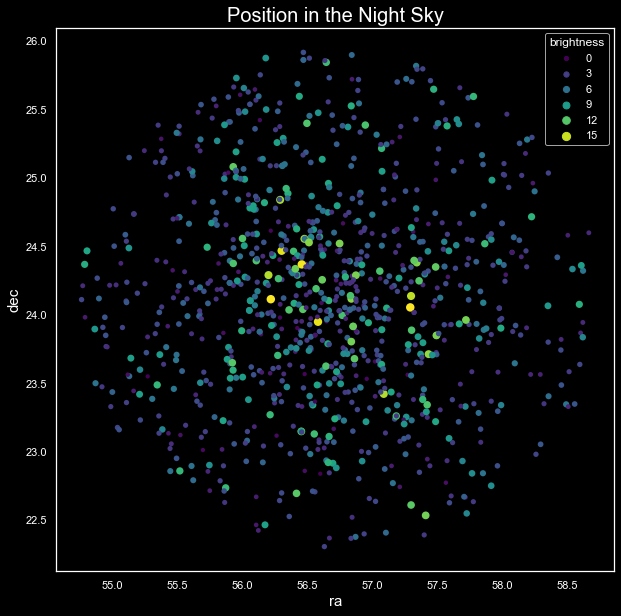

In [5]:
gmagmax1=df['gmag'].max()
brightness=gmagmax1-df.loc[:,'gmag'].values
df['brightness']=brightness
plt.figure(figsize=(10,10),facecolor='black')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
ax=sns.scatterplot(data=df,x='ra',y='dec',size='brightness',hue='brightness', palette="viridis",cmap=True,linewidth=0)
ax.set_title('Position in the Night Sky',fontdict= { 'fontsize': 20, 'color':'white'})
ax.grid(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.setp(ax.get_legend().get_texts(), color='white')
plt.setp(ax.get_legend().get_title(), color='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

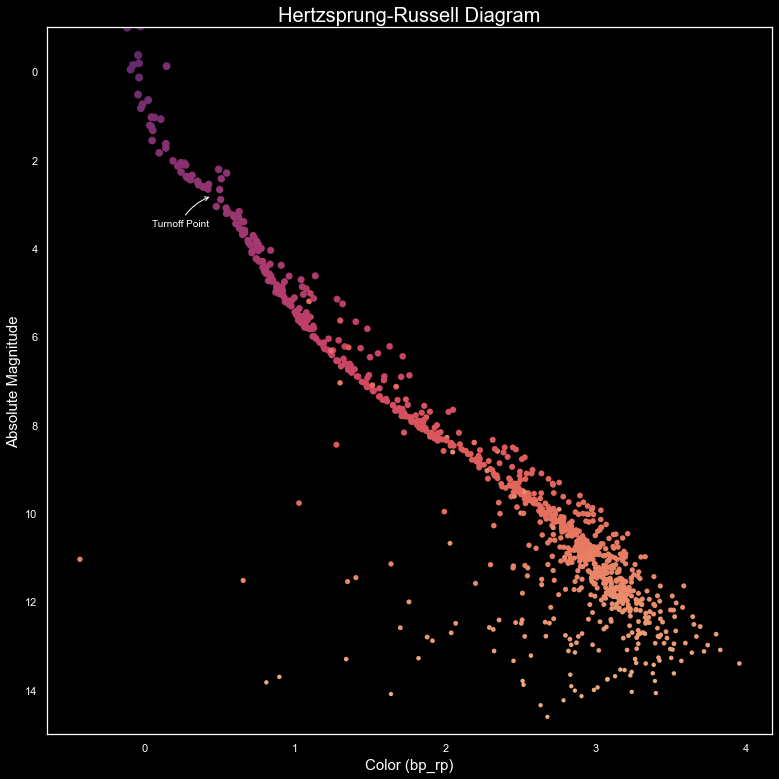

In [6]:
df.dropna(subset = ["bp_rp"], inplace=True)
M=df.loc[:,'gmag']-5*(np.log10(1000/(df.loc[:,'plx']))-1)
df['M']=M
plt.figure(figsize=(13,13))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
ax=sns.scatterplot(data=df,x='bp_rp',y='M',size='brightness',hue='brightness', palette="flare",linewidth=0,legend=False)
plt.gca().invert_yaxis()
plt.ylim(15,-1)
ax.set_title('Hertzsprung-Russell Diagram',fontdict= { 'fontsize': 20, 'color':'white'})
ax.grid(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.set(xlabel='Color (bp_rp)')
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_color('white')
ax.set(ylabel='Absolute Magnitude')
ax.yaxis.label.set_fontsize(15)
#ax.annotate('Turnoff Point',xy=(0.3,3.8), fontsize='small', color='white')
ax.annotate('Turnoff Point', xy=(0.445, 2.82),fontsize='small', color='white',xytext=(-60, -30), textcoords='offset points',arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-.2",color='white'))
plt.show()

Now the formula to calculate the age of a cluster is $t_{age}=t_{sun} \frac{L_{sun}M}{LM_{sun}}$ where $t_{sun}=15\times10^9$ putting all the values we get the approx age as $84\times10^9$ years